# Import necessary libraries 💼

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Introduction 📚

Welcome to an exciting journey through the history of international football matches! 🚀 In this notebook, we'll unravel the stories embedded in the dataset containing 45,315 results, spanning from the inaugural match in 1872 to the year 2023. This comprehensive collection includes data on FIFA World Cup clashes, FIFI Wild Cup encounters, and regular friendly matches.

# About the Dataset 📊

The dataset, meticulously curated from sources like Wikipedia, rsssf.com, and football associations' websites, offers a goldmine of information. It encompasses various facets of the beautiful game, including match dates, team names, scores, tournament details, and more.

Dataset Components 📋
results.csv: Core match data

Columns: date, home_team, away_team, home_score, away_score, tournament, city, country, neutral
shootouts.csv: Penalty shootout details

Columns: date, home_team, away_team, winner, first_shooter
goalscorers.csv: Goal-scoring specifics

Columns: date, home_team, away_team, team, scorer, own_goal, penalty

## Objective 🎯

Our mission is to unearth compelling insights, answering questions about the best teams of all time, dominance in different eras, trends in international football, geopolitical influences, and more. So, buckle up as we embark on this thrilling expedition through the world of football! ⚽🌍

# Dataset Overview 📊

In [2]:
Core_Match_Data = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')

Goal_Scoring_Specifics = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv')

Penalty_Shootout_Details = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv')

In [3]:
Core_Match_Data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47121,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True
47122,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
47123,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True
47124,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True


In [4]:
Goal_Scoring_Specifics

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44105,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,73.0,False,True
44106,2024-02-10,Qatar,Jordan,Qatar,Akram Afif,90.0,False,True
44107,2024-02-11,Ivory Coast,Nigeria,Nigeria,William Troost-Ekong,38.0,False,False
44108,2024-02-11,Ivory Coast,Nigeria,Ivory Coast,Franck Kessié,62.0,False,False


In [5]:
Penalty_Shootout_Details

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN
...,...,...,...,...,...
631,2024-03-26,New Zealand,Tunisia,Tunisia,New Zealand
632,2024-03-26,Wales,Poland,Poland,Poland
633,2024-03-26,Georgia,Greece,Georgia,Georgia
634,2024-03-26,Turks and Caicos Islands,Anguilla,Anguilla,Turks and Caicos Islands


# Exploratory Data Analysis (EDA) 🕵️‍♂️

## Best Team of All Time 🏆

In [6]:
# Calculate win percentages for each team
home_wins = Core_Match_Data[Core_Match_Data['home_score'] > Core_Match_Data['away_score']]['home_team'].value_counts()
away_wins = Core_Match_Data[Core_Match_Data['away_score'] > Core_Match_Data['home_score']]['away_team'].value_counts()

total_matches_home = Core_Match_Data['home_team'].value_counts()
total_matches_away = Core_Match_Data['away_team'].value_counts()

# Combine home and away wins to get total wins
total_wins = home_wins.add(away_wins, fill_value=0)

# Calculate win percentages
win_percentages = (total_wins / (total_matches_home + total_matches_away) * 100).sort_values(ascending=False)

# Display the top 10 teams with the highest win percentages
top_teams = win_percentages.head(10)
top_teams

Yorkshire             71.428571
Padania               68.181818
Parishes of Jersey    66.666667
Biafra                66.666667
Franconia             66.666667
County of Nice        66.666667
Basque Country        65.517241
Jersey                65.517241
Brazil                63.829787
Andalusia             61.538462
Name: count, dtype: float64

In [7]:
# Filter matches from 2000 to 2023
matches_2000_to_2023 = Core_Match_Data[(Core_Match_Data['date'] >= '2000-01-01') & (Core_Match_Data['date'] <= '2023-12-31')]

# Group by team and calculate overall performance metrics
team_performance_2000_to_2023 = matches_2000_to_2023.groupby('home_team').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'tournament': 'count',
    'neutral': 'sum'
}).reset_index()

team_performance_2000_to_2023.columns = ['Team', 'Average_Home_Score', 'Average_Away_Score', 'Matches_Played', 'Neutral_Ground']

# Calculate overall score by giving more weight to tournament matches
team_performance_2000_to_2023['Overall_Score'] = team_performance_2000_to_2023['Matches_Played'] + 2 * team_performance_2000_to_2023['Neutral_Ground']

# Sort teams by overall score in descending order
best_teams_2000_to_2023 = team_performance_2000_to_2023.sort_values(by='Overall_Score', ascending=False).head(10)

# Bar Chart for the Best Teams from 2000 to 2023
fig_best_teams_2000_to_2023 = px.bar(best_teams_2000_to_2023, x='Team', y='Overall_Score',
                                     title='Best Teams from 2000 to 2023',
                                     labels={'Team': 'Football Team', 'Overall_Score': 'Overall Score'})
fig_best_teams_2000_to_2023.show()

In [8]:
# Filter matches between Argentina and Brazil
argentina_vs_brazil_matches = Core_Match_Data[
    ((Core_Match_Data['home_team'] == 'Argentina') & (Core_Match_Data['away_team'] == 'Brazil')) |
    ((Core_Match_Data['home_team'] == 'Brazil') & (Core_Match_Data['away_team'] == 'Argentina'))
]

# Overview of Argentina vs Brazil matches
total_matches = len(argentina_vs_brazil_matches)
print(f"Total Matches between Argentina and Brazil: {total_matches}")

# Historical Scores
argentina_vs_brazil_matches['winner'] = np.where(argentina_vs_brazil_matches['home_score'] > argentina_vs_brazil_matches['away_score'],
                                                 'Arg',
                                                 np.where(argentina_vs_brazil_matches['home_score'] < argentina_vs_brazil_matches['away_score'],
                                                          'Brazil', 'Draw'))

# Count the number of wins for each team
win_counts = argentina_vs_brazil_matches['winner'].value_counts()

# Print the number of wins for each team
print(f"Arg Wins: {win_counts.get('Arg', 0)}")
print(f"Brazil Wins: {win_counts.get('Brazil', 0)}")
print(f"Draws: {win_counts.get('Draw', 0)}")

# Line Chart for Scores over Time
fig_scores_over_time = px.line(argentina_vs_brazil_matches, x='date', y=['home_score', 'away_score'],
                                title='Argentina vs Brazil - Scores Over Time',
                                labels={'date': 'Match Date', 'value': 'Score', 'variable': 'Team'},
                                color_discrete_map={'home_score': 'blue', 'away_score': 'green'})

# Modify legend names
fig_scores_over_time.for_each_trace(lambda t: t.update(name=t.name.replace("home_score", "Arg").replace("away_score", "Brazil")))

fig_scores_over_time.show()

Total Matches between Argentina and Brazil: 109
Arg Wins: 55
Brazil Wins: 28
Draws: 26


/tmp/ipykernel_26/167912492.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
# Filter matches between Germany and Spain
germany_vs_spain_matches = Core_Match_Data[
    ((Core_Match_Data['home_team'] == 'Germany') & (Core_Match_Data['away_team'] == 'Spain')) |
    ((Core_Match_Data['home_team'] == 'Spain') & (Core_Match_Data['away_team'] == 'Germany'))
]

# Overview of Germany vs Spain matches
total_matches = len(germany_vs_spain_matches)
print(f"Total Matches between Germany and Spain: {total_matches}")

# Historical Scores
germany_vs_spain_matches['winner'] = np.where(germany_vs_spain_matches['home_score'] > germany_vs_spain_matches['away_score'],
                                              'Germany',
                                              np.where(germany_vs_spain_matches['home_score'] < germany_vs_spain_matches['away_score'],
                                                       'Spain', 'Draw'))

# Count the number of wins for each team
win_counts = germany_vs_spain_matches['winner'].value_counts()

# Print the number of wins for each team
print(f"Germany Wins: {win_counts.get('Germany', 0)}")
print(f"Spain Wins: {win_counts.get('Spain', 0)}")
print(f"Draws: {win_counts.get('Draw', 0)}")

# Line Chart for Scores over Time
fig_scores_over_time = px.line(germany_vs_spain_matches, x='date', y=['home_score', 'away_score'],
                               title='Germany vs Spain - Scores Over Time',
                               labels={'date': 'Match Date', 'value': 'Score', 'variable': 'Team'},
                               color_discrete_map={'home_score': 'black', 'away_score': 'red'})

# Modify legend names
fig_scores_over_time.for_each_trace(lambda t: t.update(name=t.name.replace("home_score", "Germany").replace("away_score", "Spain")))

fig_scores_over_time.show()

Total Matches between Germany and Spain: 26
Germany Wins: 10
Spain Wins: 7
Draws: 9


/tmp/ipykernel_26/3981604446.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
# Group by player and sum the number of goals scored
top_goal_scorers = Goal_Scoring_Specifics.groupby('scorer')['team'].count().reset_index(name='goals_scored')

# Sort the dataframe by goals_scored in descending order to get the top goal-scorers
top_goal_scorers = top_goal_scorers.sort_values(by='goals_scored', ascending=False)

# Select the top N goal-scorers (you can modify N based on your preference)
top_n_scorers = 10
top_goal_scorers = top_goal_scorers.head(top_n_scorers)

# Bar chart for the top goal-scorers
fig_top_scorers = px.bar(top_goal_scorers, x='scorer', y='goals_scored',
                         title='Top Goal-scorers in International Football',
                         labels={'scorer': 'Player', 'goals_scored': 'Goals Scored'},
                         color='goals_scored',
                         color_continuous_scale='viridis')

fig_top_scorers.update_layout(xaxis_title='Player', yaxis_title='Goals Scored')
fig_top_scorers.show()

In [11]:
# Filter matches where Egypt is either the home or away team
egypt_matches = Core_Match_Data[(Core_Match_Data['home_team'] == 'Egypt') | (Core_Match_Data['away_team'] == 'Egypt')]

# Calculate Egypt's win percentage
egypt_home_wins = egypt_matches[egypt_matches['home_score'] > egypt_matches['away_score']].shape[0]
egypt_away_wins = egypt_matches[egypt_matches['away_score'] > egypt_matches['home_score']].shape[0]
total_egypt_matches = egypt_matches.shape[0]

egypt_win_percentage = ((egypt_home_wins + egypt_away_wins) / total_egypt_matches) * 100
print(f"Egypt's Win Percentage: {egypt_win_percentage:.2f}%")

# Calculate goal differentials for Egypt
egypt_goal_diff = egypt_matches['home_score'].sum() - egypt_matches['away_score'].sum()
print(f"Egypt's Goal Differential: {egypt_goal_diff}")

# Identify top goal scorers for Egypt
egypt_goal_scorers = Goal_Scoring_Specifics[Goal_Scoring_Specifics['team'] == 'Egypt']
top_egypt_scorers = egypt_goal_scorers['scorer'].value_counts().head(5)
print("\nTop Goal Scorers for Egypt:")
print(top_egypt_scorers)

Egypt's Win Percentage: 75.86%
Egypt's Goal Differential: 598.0

Top Goal Scorers for Egypt:
scorer
Mohamed Salah        20
Mohamed Aboutrika    20
Hossam Hassan        20
Amr Zaki             17
Ahmed Hassan         16
Name: count, dtype: int64


In [12]:
# Interactive Visualization for Goal Differentials (Gauge Chart)
fig_goal_differentials = go.Figure(go.Indicator(
    mode="gauge+number",
    value=egypt_goal_diff,
    title={'text': "Egypt's Goal Differential"},
    domain={'x': [0, 1], 'y': [0, 1]},
    gauge={'axis': {'range': [-50, 50]},
           'steps': [{'range': [-50, 0], 'color': 'red'},
                     {'range': [0, 50], 'color': 'green'}],
           'threshold': {'line': {'color': "black", 'width': 4}, 'thickness': 0.75, 'value': 0}}
))
fig_goal_differentials.show()

# Interactive Visualization for Top Goal Scorers (Bar Chart)
fig_top_scorers = px.bar(x=top_egypt_scorers.index, y=top_egypt_scorers.values,
                         title="Top Goal Scorers for Egypt in International Football",
                         labels={'x': 'Player', 'y': 'Goals'})
fig_top_scorers.show()

In [13]:
# Line Chart for Goal Trend Over the Years
egypt_goal_trend = egypt_matches.groupby('date')['home_score'].sum() + egypt_matches.groupby('date')['away_score'].sum()

fig_goal_trend = px.line(x=egypt_goal_trend.index, y=egypt_goal_trend.values, title="Egypt's Goal Trend Over the Years")
fig_goal_trend.update_xaxes(title_text='Year')
fig_goal_trend.update_yaxes(title_text='Total Goals')
fig_goal_trend.show()

# Dominant Teams in Different Eras ⏳

In [14]:
import datetime

# Convert the 'date' column to datetime format
Core_Match_Data['date'] = pd.to_datetime(Core_Match_Data['date'], errors='coerce')

# Define the time periods for different eras
eras = [
    {'start_date': '1872-01-01', 'end_date': '1950-12-31'},
    {'start_date': '1951-01-01', 'end_date': '1970-12-31'},
    {'start_date': '1971-01-01', 'end_date': '1990-12-31'},
    {'start_date': '1991-01-01', 'end_date': '2010-12-31'},
    {'start_date': '2011-01-01', 'end_date': '2023-12-31'}
]

# Create a new DataFrame to store dominant teams in different eras
dominant_teams_by_era = pd.DataFrame()

# Calculate dominant teams for each era based on total wins, win percentage, and goal differential
for era in eras:
    era_matches = Core_Match_Data[(Core_Match_Data['date'] >= era['start_date']) & (Core_Match_Data['date'] <= era['end_date'])]
    
    era_team_stats = pd.DataFrame()
    era_team_stats['total_wins'] = era_matches['home_team'].value_counts() + era_matches['away_team'].value_counts()
    era_team_stats['win_percentage'] = era_team_stats['total_wins'] / (era_matches['home_team'].value_counts() + era_matches['away_team'].value_counts()) * 100
    era_team_stats['goal_differential'] = era_matches.groupby('home_team')['home_score'].sum() - era_matches.groupby('away_team')['away_score'].sum()
    
    dominant_teams = era_team_stats.sort_values(by=['total_wins', 'win_percentage', 'goal_differential'], ascending=False).head(1)
    dominant_teams['start_date'] = era['start_date']
    dominant_teams['end_date'] = era['end_date']
    
    dominant_teams_by_era = pd.concat([dominant_teams_by_era, dominant_teams])

# Display the dominant teams in different eras
print(dominant_teams_by_era[['start_date', 'end_date', 'total_wins', 'win_percentage', 'goal_differential']])

             start_date    end_date  total_wins  win_percentage  \
Sweden       1872-01-01  1950-12-31       277.0           100.0   
Brazil       1951-01-01  1970-12-31       213.0           100.0   
South Korea  1971-01-01  1990-12-31       328.0           100.0   
Mexico       1991-01-01  2010-12-31       387.0           100.0   
Mexico       2011-01-01  2023-12-31       225.0           100.0   

             goal_differential  
Sweden                   183.0  
Brazil                   150.0  
South Korea              166.0  
Mexico                   273.0  
Mexico                    89.0  


In [15]:
# Reset index for plotting
dominant_teams_by_era_reset = dominant_teams_by_era.reset_index()

# Create an interactive bar plot
fig = px.bar(
    dominant_teams_by_era_reset,
    x='start_date',
    y='total_wins',
    color='index',
    labels={'index': 'Team'},
    title='Total Wins for Dominant Teams in Different Eras',
    height=600
)

# Add interactivity
fig.update_layout(
    xaxis_title='Era',
    yaxis_title='Total Wins',
    legend_title='Team',
    xaxis=dict(tickangle=45),
    barmode='group'
)

# Show the interactive plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Trends in International Football 📈

In [16]:
# Convert the date column to datetime format
Core_Match_Data['date'] = pd.to_datetime(Core_Match_Data['date'])

# Create a new column for total goals scored
Core_Match_Data['total_goals'] = Core_Match_Data['home_score'] + Core_Match_Data['away_score']

# Create an interactive line plot
fig = px.line(Core_Match_Data, x='date', y='total_goals', title='Total Goals Scored Over Time',
              labels={'total_goals': 'Total Goals', 'date': 'Date'})
fig.update_xaxes(tickangle=45)
fig.show()

In [17]:
# Create an interactive histogram for total wins distribution
fig = px.histogram(dominant_teams_by_era_reset, x='total_wins', nbins=20,
                   title='Distribution of Teams\' Total Wins',
                   labels={'total_wins': 'Total Wins', 'count': 'Frequency'})
fig.show()

In [18]:
# # Create a map to visualize the geographical distribution of matches
# fig_geographical_distribution = px.scatter_geo(Core_Match_Data, 
#                                               locations="country", 
#                                               locationmode="country names",
#                                               title='Geographical Distribution of Matches',
#                                               projection="natural earth",
#                                               color="total_goals",
#                                               size="total_goals",
#                                               hover_name="country",
#                                               labels={'total_goals': 'Total Goals'},
#                                               template="plotly_dark")

# fig_geographical_distribution.show()

In [19]:
# Filter matches that are part of the FIFA World Cup
fifa_world_cup_matches = Core_Match_Data[Core_Match_Data['tournament'] == 'FIFA World Cup']

# Group by team and calculate performance metrics
team_performance_fifa_world_cup = fifa_world_cup_matches.groupby('home_team').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'tournament': 'count',
    'neutral': 'sum'
}).reset_index()

team_performance_fifa_world_cup.columns = ['Team', 'Average_Home_Score', 'Average_Away_Score', 'Matches_Played', 'Neutral_Ground']

# Calculate overall score by giving more weight to tournament matches
team_performance_fifa_world_cup['Overall_Score'] = team_performance_fifa_world_cup['Matches_Played'] + 2 * team_performance_fifa_world_cup['Neutral_Ground']

# Sort teams by overall score in descending order
best_teams_fifa_world_cup = team_performance_fifa_world_cup.sort_values(by='Overall_Score', ascending=False).head(10)

# Bar Chart for the Best Teams in FIFA World Cup
fig_best_teams_fifa_world_cup = px.bar(best_teams_fifa_world_cup, x='Team', y='Overall_Score',
                                       title='Best Teams in FIFA World Cup',
                                       labels={'Team': 'Football Team', 'Overall_Score': 'Overall Score'})
fig_best_teams_fifa_world_cup.show()

In [20]:
# Group by date and calculate total goals scored
total_goals_over_time = Core_Match_Data.groupby('date')['total_goals'].sum().reset_index()

# Line Chart for Goal Trend Over the Years
fig_goal_trend = px.line(x=total_goals_over_time['date'], y=total_goals_over_time['total_goals'],
                         title="Total Goals Trend Over the Years",
                         labels={'date': 'Year', 'total_goals': 'Total Goals'})

fig_goal_trend.show()

In [21]:
# Sunburst Chart for Tournament Distribution
fig_sunburst = px.sunburst(Core_Match_Data, path=['tournament', 'country'], title='Tournament Distribution',
                           labels={'country': 'Country'},
                           width=800, height=800)
fig_sunburst.show()

In [22]:
# Group by country and calculate total wins
total_wins_by_country = Core_Match_Data.groupby('country')['home_score'].count().reset_index(name='total_wins')

# Choropleth Map for Total Wins by Country
fig_choropleth = px.choropleth(total_wins_by_country, locations='country', locationmode='country names',
                                color='total_wins', title='Total Wins by Country',
                                labels={'total_wins': 'Total Wins'},
                                color_continuous_scale='Viridis')

fig_choropleth.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='natural earth'))
fig_choropleth.show()

# Host Countries and Tournaments 🏟️

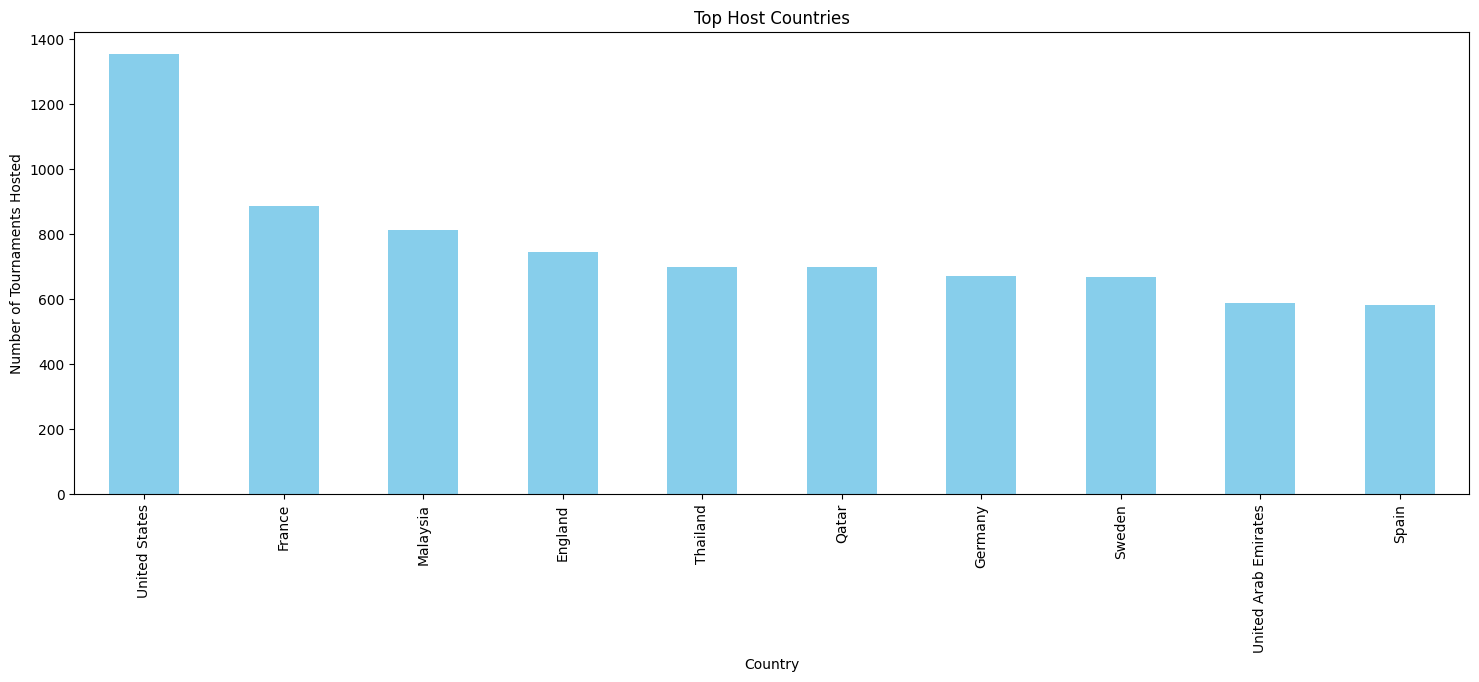

In [23]:
plt.figure(figsize=(18, 6))
top_host_countries = Core_Match_Data['country'].value_counts().head(10)
top_host_countries.plot(kind='bar', color='skyblue')
plt.title('Top Host Countries')
plt.xlabel('Country')
plt.ylabel('Number of Tournaments Hosted')
plt.show()

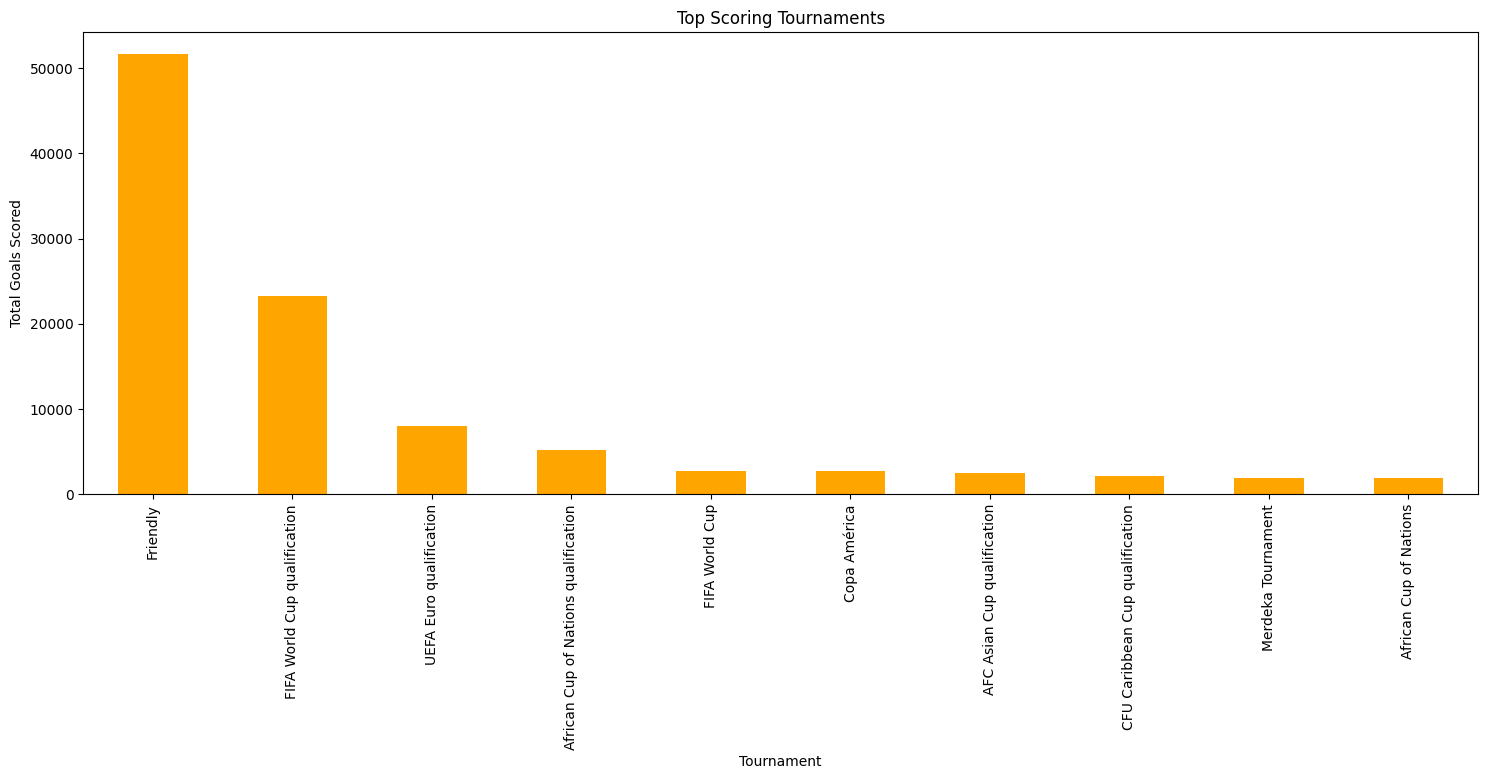

In [24]:
plt.figure(figsize=(18, 6))
top_tournaments = Core_Match_Data.groupby('tournament')['home_score'].sum() + Core_Match_Data.groupby('tournament')['away_score'].sum()
top_tournaments = top_tournaments.sort_values(ascending=False).head(10)
top_tournaments.plot(kind='bar', color='orange')
plt.title('Top Scoring Tournaments')
plt.xlabel('Tournament')
plt.ylabel('Total Goals Scored')
plt.show()

# Active Teams in Friendlies 🤝

In [25]:
# Assuming 'home_team' column contains the team names
active_teams_friendlies = Core_Match_Data[Core_Match_Data['tournament'] == 'Friendly']
total_friendlies_by_team = active_teams_friendlies['home_team'].value_counts().reset_index()

# Rename the columns for clarity
total_friendlies_by_team.columns = ['Team', 'Total Friendlies']

# Sort the dataframe by the total number of friendlies
total_friendlies_by_team = total_friendlies_by_team.sort_values(by='Total Friendlies', ascending=False)

# Create an interactive bar plot
fig = px.bar(total_friendlies_by_team, x='Total Friendlies', y='Team',
             title='Total Friendlies Played by Each Team',
             labels={'Total Friendlies': 'Total Friendlies', 'Team': 'Team'},
             orientation='h',
             color='Total Friendlies',
             color_continuous_scale='viridis')

fig.update_layout(xaxis_title='Total Friendlies', yaxis_title='Team')
fig.show()

# Individual Player Performance ⚽

In [26]:
# Assuming 'scorer' is the column representing player names and 'minute' is the column representing player performance
top_players = Goal_Scoring_Specifics.groupby('scorer')['minute'].sum().sort_values(ascending=False).head(5).index

# Filter the data for the top 5 players
top_players_data = Goal_Scoring_Specifics[Goal_Scoring_Specifics['scorer'].isin(top_players)]

# Create the polar line plot
fig = px.line_polar(top_players_data, 
                    r='minute',  
                    theta='scorer',  
                    line_close=True,
                    hover_name='team',  
                    title='Top 5 Players Goal-Scoring Performance',
                    template='plotly_dark')

fig.update_traces(fill='toself')

fig.show()

In [27]:
# Assuming you have already defined scorers_df, if not, please define it first

Goal_Scoring_Specifics['opponent'] = Goal_Scoring_Specifics.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = Goal_Scoring_Specifics.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh', 'Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']

top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

# Radar chart
fig = go.Figure()

for player in players:
    player_data = top_players_stats[top_players_stats['scorer'] == player]
    fig.add_trace(go.Scatterpolar(
        r=player_data['goals'],
        theta=player_data['opponent'],
        fill='toself',
        name=player
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(top_players_stats['goals']) + 1]
        )
    ),
    showlegend=True,
    title='Goals scored against favorite opponents by famous goalscorers'
)

fig.show()

/tmp/ipykernel_26/566023946.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
Goal_Scoring_Specifics['opponent'] = Goal_Scoring_Specifics.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = Goal_Scoring_Specifics.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh','Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']
top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

fig = px.bar(top_players_stats, x='goals',
             y= 'scorer',
             color = 'goals',
             title = 'Goals scored against favorite opponents by famous goalscorers',
             text = 'label',
             orientation = 'h')
            
fig.show()

/tmp/ipykernel_26/945098600.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

